In [39]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.linear_model import RidgeCV

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:title={'center':'Age Vs BloodPressure'}, xlabel='Age', ylabel='RestingBP'>

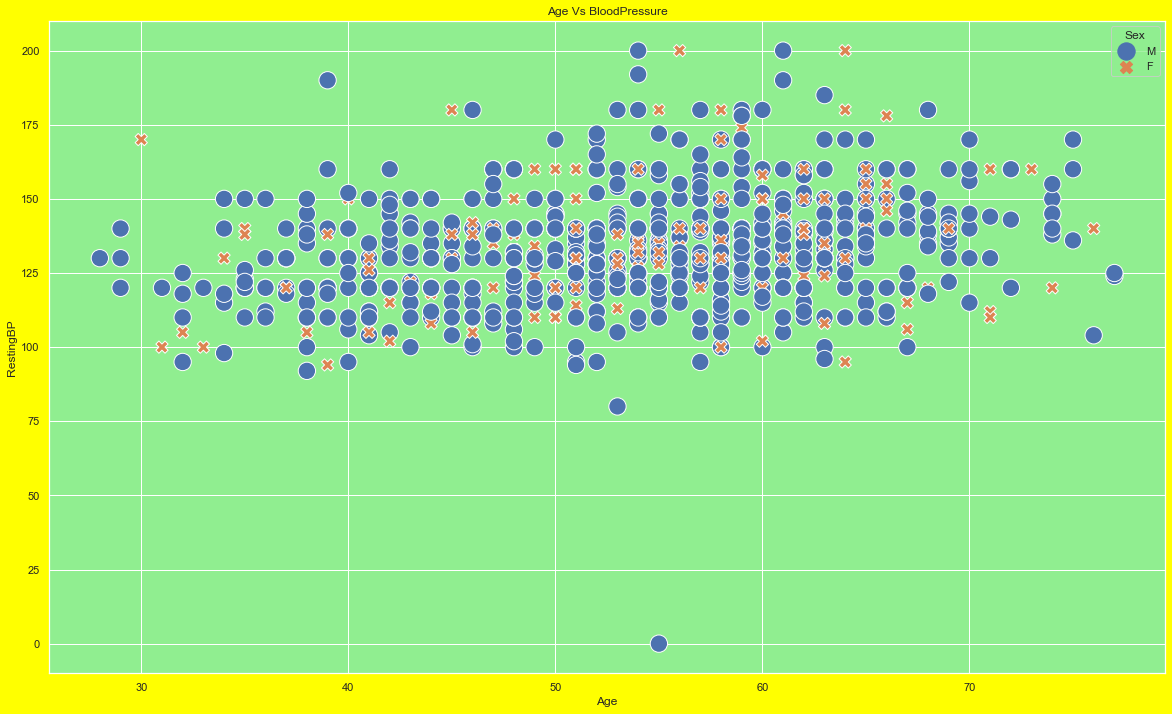

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'lightgreen', 'figure.facecolor':'yellow'})
ax.set_title('Age Vs BloodPressure')
sns.scatterplot(data=data, x='Age', y='RestingBP', hue='Sex', style='Sex', size='Sex', sizes=(150, 300))

<AxesSubplot:title={'center':'Major types of Chest Pains Seen in Pateints'}, xlabel='ChestPainType', ylabel='count'>

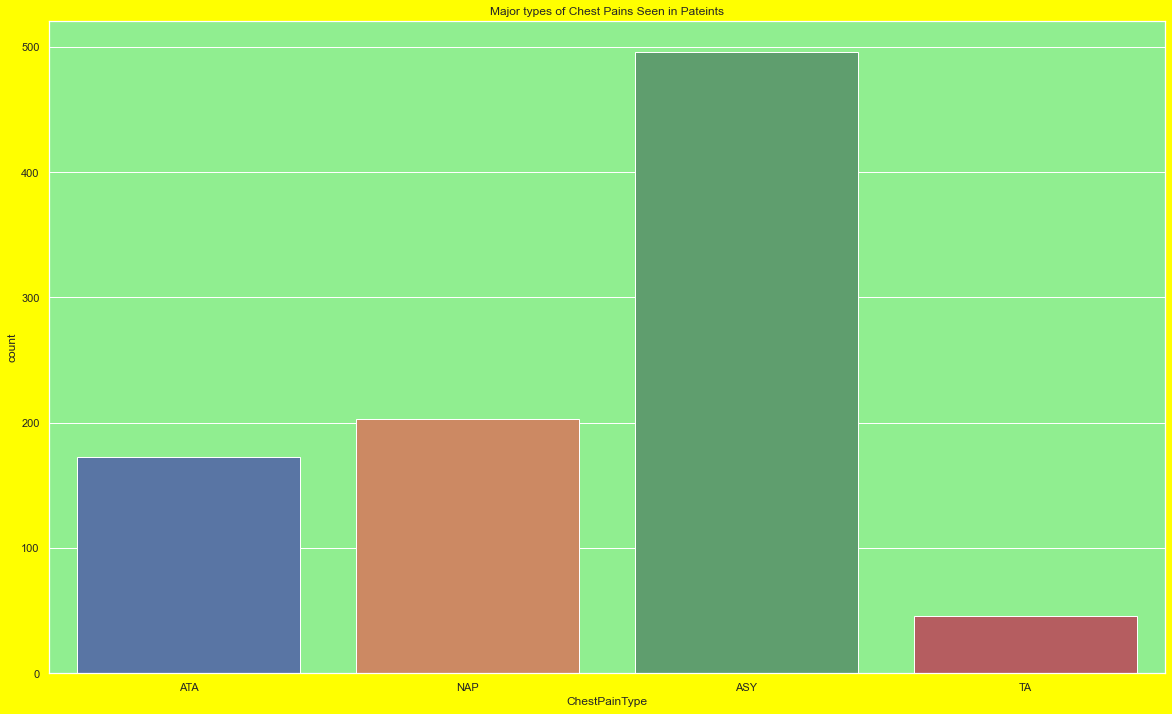

In [13]:
fig, ax = plt.subplots(figsize=(20,12))
ax.set_title('Major types of Chest Pains Seen in Pateints')
sns.countplot(data = data, x='ChestPainType')

In [16]:
categorials = list(data.dtypes[data.dtypes == object].index) #признаки с категориальными данными
categorials

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [18]:
integer = [f for f in data if f not in (categorials)] #признаки с числовыми данными
integer

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [21]:
category_columns = pd.get_dummies(data[categorials]) #преобразуем категориальные признаки в числовые
print(category_columns.info())
category_columns.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sex_F              918 non-null    uint8
 1   Sex_M              918 non-null    uint8
 2   ChestPainType_ASY  918 non-null    uint8
 3   ChestPainType_ATA  918 non-null    uint8
 4   ChestPainType_NAP  918 non-null    uint8
 5   ChestPainType_TA   918 non-null    uint8
 6   RestingECG_LVH     918 non-null    uint8
 7   RestingECG_Normal  918 non-null    uint8
 8   RestingECG_ST      918 non-null    uint8
 9   ExerciseAngina_N   918 non-null    uint8
 10  ExerciseAngina_Y   918 non-null    uint8
 11  ST_Slope_Down      918 non-null    uint8
 12  ST_Slope_Flat      918 non-null    uint8
 13  ST_Slope_Up        918 non-null    uint8
dtypes: uint8(14)
memory usage: 12.7 KB
None


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
236,0,1,1,0,0,0,0,1,0,0,1,0,1,0
895,0,1,1,0,0,0,0,1,0,0,1,0,1,0
227,0,1,1,0,0,0,0,1,0,0,1,0,1,0
851,1,0,1,0,0,0,1,0,0,1,0,0,0,1
134,1,0,1,0,0,0,0,0,1,0,1,0,1,0


In [22]:
data_final = pd.concat([data[integer], category_columns], axis=1)
print(data_final.info())
data_final.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
217,54,120,217,0,137,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
627,44,140,235,0,180,0.0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
757,50,140,233,0,163,0.6,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
727,60,158,305,0,161,0.0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1
457,40,125,0,1,165,0.0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0


In [23]:
X = data_final.drop(['HeartDisease'], axis=1)
X.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
278,57,180,347,0,126,0.8,1,0,1,0,0,0,0,0,1,0,1,0,1,0
133,56,150,230,0,124,1.5,0,1,1,0,0,0,0,0,1,0,1,0,1,0
885,53,128,216,0,115,0.0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
902,58,125,220,0,144,0.4,0,1,0,1,0,0,0,1,0,1,0,0,1,0
538,54,130,202,1,112,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0


In [24]:
y = data_final['HeartDisease']
y.sample(5)

623    1
341    1
515    0
780    0
430    1
Name: HeartDisease, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [32]:
importances = dtc.feature_importances_
feature_names = list(data_final.columns.drop(['HeartDisease']))
print(feature_names)
dtc_importances = pd.Series(importances, index=feature_names)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


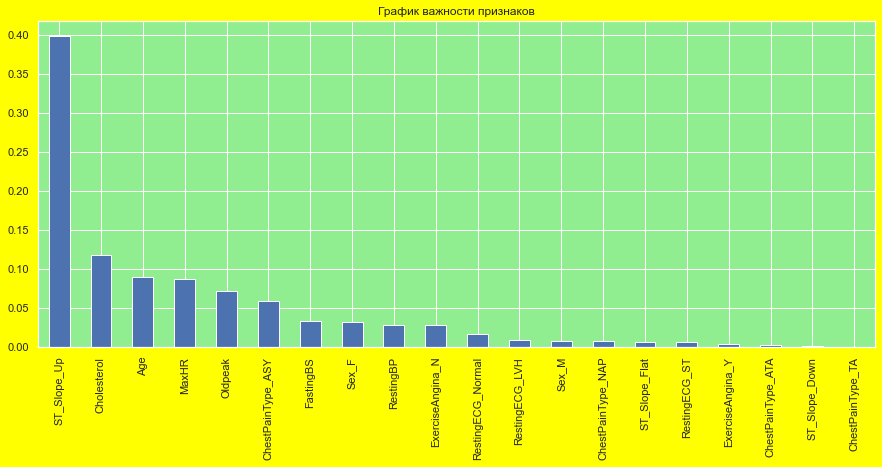

In [33]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title('График важности признаков')
dtc_importances.sort_values(ascending=False).plot.bar(ax=ax)
plt.show()

In [34]:
rfc = RandomForestClassifier(max_depth=2, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [35]:
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, random_state=42)

In [36]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=42)

In [37]:
y_pred = bagging.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        77
           1       0.92      0.79      0.85       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.86      0.84      0.84       184



In [40]:
estimators = [
     ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
     ('RandomForestClassifier', RandomForestClassifier(max_depth=2, random_state=42)),
     ('LinearSVC', make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5)))
             ]

In [41]:
staking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42)).fit(X_train, y_train)

/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

In [42]:
y_pred = staking_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [43]:
score_train = {}
score_test = {}

for i in staking_clf.named_estimators:
    score_train[i] = staking_clf.named_estimators_[i].score(X_train, y_train)
    score_test[i] = staking_clf.named_estimators_[i].score(X_test, y_test)

score_train['Total']= staking_clf.score(X_train, y_train)
score_test['Total']= staking_clf.score(X_test, y_test)

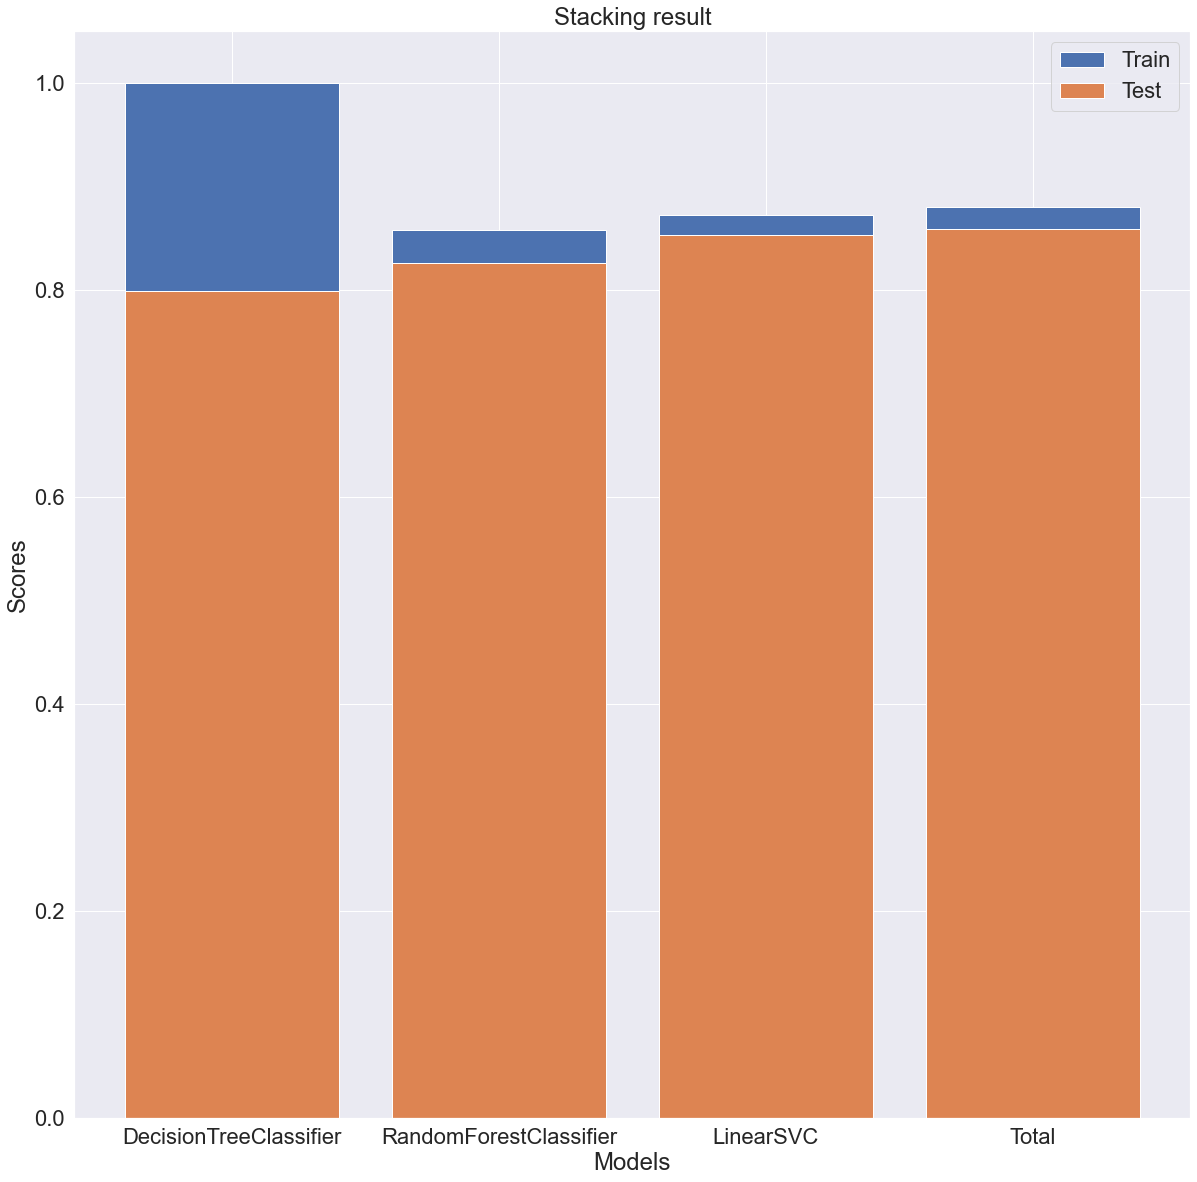

In [48]:
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

Лучше всех справилась LinearSVC. Деревья решений, как и предполагалось, переобучилась. Модель случайный лес 
тоже не плохо справилась с задачей.